### AUCの比較

分布の重なりが異なるデータで、精度およびAUCがどのように変化するかを比較する。

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# matplotlib: 日本語フォントの設定
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 
                               'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

# Irisデータセットの読み込み
iris = sns.load_dataset('iris')

# species が setosa のデータを除去
df = iris.query('species!="setosa"')

# ダミー変数化
df = pd.get_dummies(data=df, drop_first=True)
df.iloc[[0, 50]]

# ロジスティック回帰
model = LogisticRegression(C=10000.0)

sepal_length: 正確度: 0.730, 適合度: 0.725, 再現率: 0.740
sepal_width : 正確度: 0.580, 適合度: 0.574, 再現率: 0.620
petal_length: 正確度: 0.930, 適合度: 0.922, 再現率: 0.940
petal_width : 正確度: 0.940, 適合度: 0.958, 再現率: 0.920


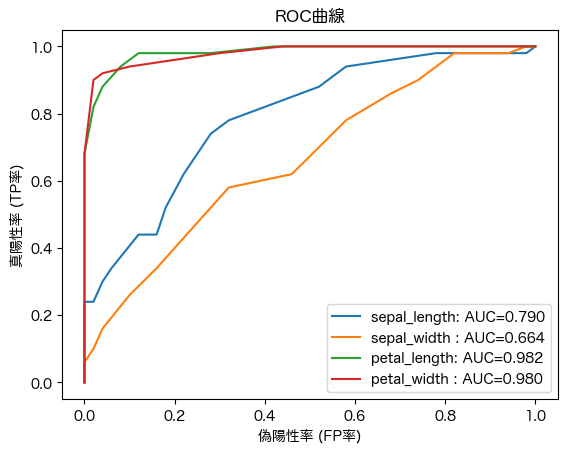

In [2]:
# dfの列名から 'species_virginica' を除去し、それぞれについて、for ループ内を実行
for X_label in df.columns.drop('species_virginica'):
    # 説明変数、目的変数
    X = df[[X_label]]
    Y = df.species_virginica

    # ロジスティック回帰モデルを作成
    model.fit(X, Y)

    # 正確度、適合度、再現率（感度）
    Y_predict = model.predict(X)
    print('{:12}: 正確度: {:.3f}, 適合度: {:.3f}, 再現率: {:.3f}'.format(X_label,
        accuracy_score(Y, Y_predict), precision_score(Y, Y_predict),
        recall_score(Y, Y_predict)))

    # 係数
    #print('{:<12.3f}'.format(model.coef_[0][0]))
    
    # ROC曲線, AUC
    Y_proba = model.predict_proba(X)
    fpr, tpr, thresholds = roc_curve(Y, Y_proba[:, 1])
    plt.plot(fpr, tpr, label='{:12}: AUC={:.3f}'.format(X_label, auc(fpr, tpr)))
    plt.legend()

plt.xlabel('偽陽性率 (FP率)')
plt.ylabel('真陽性率 (TP率)')
plt.title('ROC曲線')
plt.show()

散布図でのデータの重なりと、精度およびAUCを比較する。

- 重なりが少なく、うまく分類できそうな petal_length, petal_width
- 重なりが多く、分類が難しそうな sepal_length, sepal_width

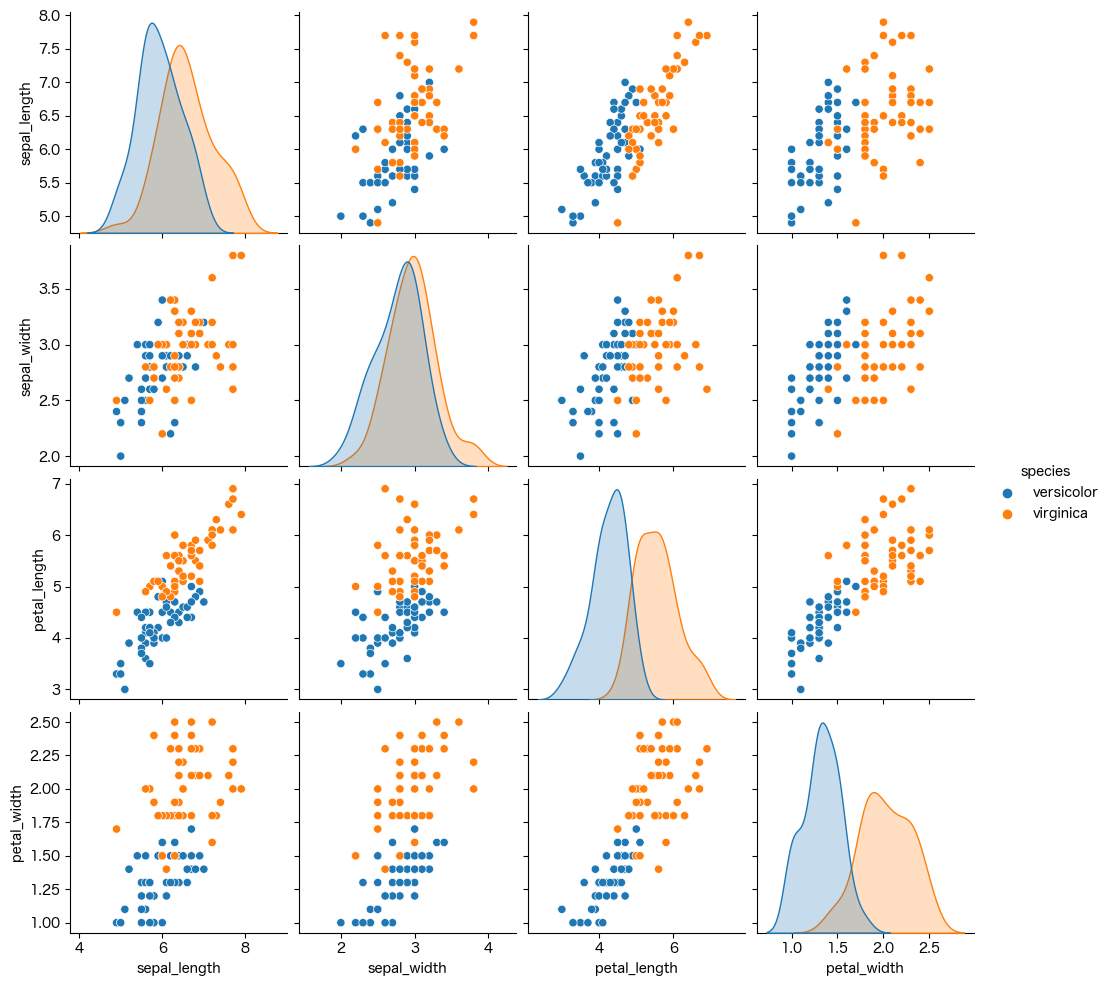

In [3]:
# 散布図
sns.pairplot(iris.query('species!="setosa"'), hue='species')